<a href="https://colab.research.google.com/github/Msamuelsons/atividade-pratica-facul/blob/main/rnn_facul_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
PrestacoesConta = [[1, 'local', 12, 10, 2300, 1],
                   [2, 'local', 1, 4, 83, 1],
                   [3, 'longa', 2, 22, 300.10, 2],
                   [4, 'local', 5, 1, 412, 1]]
tabelaContas = pd.DataFrame(data=PrestacoesConta, columns=["amostra", "tipo","duracao", "frequencia","valor", "transporte"])


In [ ]:
tabelaContas

,amostra,tipo,duracao,frequencia,valor,transporte
0,1,local,12,10,2300.0,1
1,2,local,1,4,83.0,1
2,3,longa,2,22,300.1,2
3,4,local,5,1,412.0,1


In [ ]:
tabelaContas.dtypes

amostra         int64
tipo           object
duracao         int64
frequencia      int64
valor         float64
transporte      int64
dtype: object

In [ ]:
tabelaContas['tipo'] = tabelaContas['tipo'].astype('category')
cat_col = tabelaContas.select_dtypes(['category']).columns

tabelaContas[cat_col] = tabelaContas[cat_col].apply(
    lambda x: x.cat.codes
)

In [ ]:
tabelaContas

,amostra,tipo,duracao,frequencia,valor,transporte
0,1,0,12,10,2300.0,1
1,2,0,1,4,83.0,1
2,3,1,2,22,300.1,2
3,4,0,5,1,412.0,1


In [ ]:
tabelaContas = tabelaContas.loc[:, 'tipo':]
tabelaContas

,tipo,duracao,frequencia,valor,transporte
0,0,12,10,2300.0,1
1,0,1,4,83.0,1
2,1,2,22,300.1,2
3,0,5,1,412.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()

escala.fit(tabelaContas)
x_norm = escala.transform(tabelaContas)
x_norm

array([[-0.57735027,  1.62746694,  0.09325048,  1.71665332, -0.57735027],
       [-0.57735027, -0.92998111, -0.65275337, -0.77696355, -0.57735027],
       [ 1.73205081, -0.69748583,  1.58525817, -0.53277581,  1.73205081],
       [-0.57735027,  0.        , -1.02575529, -0.40691396, -0.57735027]])

In [ ]:
ResultadoPrestacoes = [[1, 0, 1, 1]]
Resultado = pd.DataFrame(data=ResultadoPrestacoes)
Resultado = Resultado.T

In [ ]:
from sklearn.neural_network import MLPRegressor
rna = MLPRegressor(
    hidden_layer_sizes=(5, 3),
    max_iter=2000,
    tol=0.00001,
    learning_rate_init=0.1,
    solver='sgd',
    activation='logistic',
    learning_rate='constant',
    verbose=0,
)

In [ ]:
rna.fit(x_norm, Resultado)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 3),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-05,
             verbose=0)

In [ ]:
y_rna_previsao = rna.predict(x_norm)
y_rna_previsao

array([1.0167634 , 0.01299285, 0.99795679, 0.97169807])

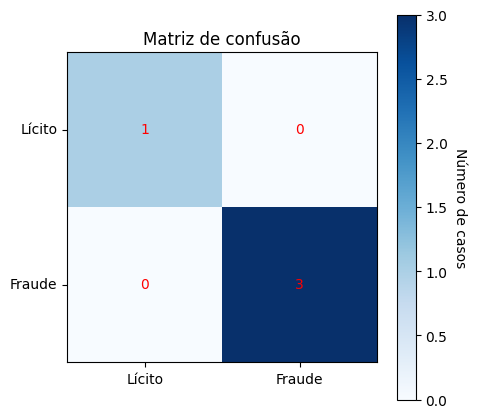

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Resultado, np.round(y_rna_previsao))

labels = ['Lícito', 'Fraude']

fig, ax = plt.subplots(figsize=(5, 5))

color = 'Blues'
im = ax.imshow(cm, cmap=color)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Número de casos', rotation=-90, va='bottom')

for i in range(len(cm)):
    for j in range(len(cm[0])):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels, ha="center")
ax.set_yticklabels(labels, va="center")

ax.set_title('Matriz de confusão')

plt.show()


## Avaliação do Erro de Treinamento e de Predição

In [ ]:
from sklearn.model_selection import train_test_split

X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(x_norm, Resultado, test_size=0.3)

### Utilizando Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras as tfk

In [ ]:
x_norm.shape[1]

5

In [ ]:
camada_entrada = tfk.layers.Input((x_norm.shape[1], ))
camada_oculta1 = tfk.layers.Dense(5, activation='relu')(camada_entrada)
camada_oculta2 = tfk.layers.Dense(3, activation='relu')(camada_oculta1)
camada_saida = tfk.layers.Dense(1, activation='relu')(camada_oculta2)
arquitetura = tfk.Model(camada_entrada, camada_saida)
arquitetura.compile(loss='msle', optimizer='sgd')
arquitetura.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52 (208.00 Byte)
Trainable params: 52 (208.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
arquitetura.fit(x_norm, Resultado, epochs=20, shuffle=True, batch_size=1)

Epoch 1/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1252
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1226
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1203
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 0.1181
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1161
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1142
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1125
Epoch 8/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1110
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1096
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1083
Epoch 11/20
4/4 [==============================] - 0s 8ms/step - loss: 0.1070
Epoch 12/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1059
Epoch 13/20
4/4 [==============================] - 0s 4ms/step - loss: 0